In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import load_iris

## Logistic Regression 
Logistic Regression is model that works like perceptron, but difference is instead of returning 0 or 1, it returns probability in range [0, 1]. It uses activation function to transform input data into probabilities. Sigmoid for binary classficitaion and Softmax for multiclass classification.

In [33]:
data = load_iris() # dataset
features = pd.DataFrame( data.data, columns = data.feature_names ) # features
target = pd.DataFrame( data.target ) # 3 classes [0, 1, 2]
features.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


I will use only one feature in order to visualize model and data for more clarity, after we will use all features:

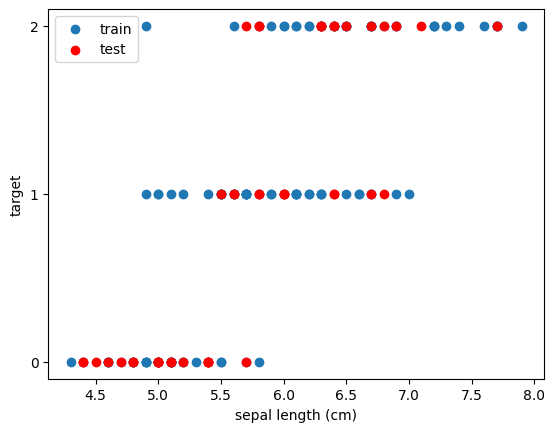

In [34]:
from sklearn.model_selection import train_test_split
single_feature = features[['sepal length (cm)']]

# Dividing data for training and testing
X_train, X_test, y_train, y_test = train_test_split( single_feature.values, target.to_numpy().ravel(), train_size=0.7, random_state= 120 )

# Plotting for more clarity
plt.scatter( X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test', c = 'red')
plt.xlabel('sepal length (cm)')
plt.yticks([0, 1, 2]) 
plt.ylabel('target')
plt.legend()
plt.show()

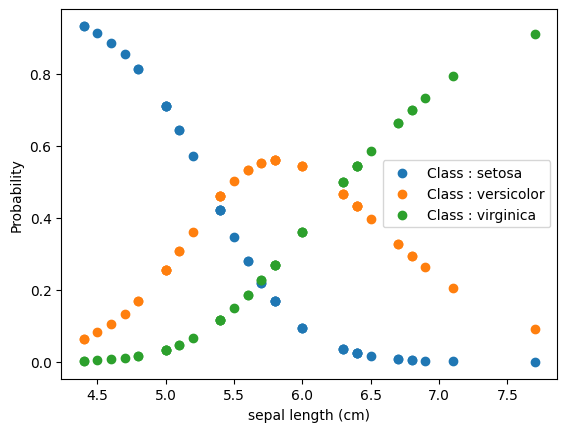

In [35]:
from sklearn.linear_model import LogisticRegression

# By default Logistic Regression used for binary classification but we can use it for multiclass classification
# Solver is optimization function( trying minimize loss function by updating model`s parameters), here it is Limited-memory Broyden-Fletcher-Goldfarb-Shanno
# The loss function by default is 'log' - cross entropy loss, but we can change it or even create own loss function and use it

def visualizing_LR( model, X_test ): 

    # predicting probabilities
    y_pred_prob = model.predict_proba( X_test )

    # naming our targets for clarity
    types = ['setosa', 'versicolor', 'virginica']

    # visualizing probabilities for every class
    for class_idx in range(y_pred_prob.shape[1]):
        plt.scatter(X_test, y_pred_prob[:, class_idx], label=f'Class : {types[class_idx]}')

    plt.xlabel('sepal length (cm)')
    plt.ylabel('Probability')
    plt.legend()

# Creating model
# Because we have multiclass classification task, Logistic Regression uses softmax (activation function) by default for it
# Very important: lbfgs is updating model`s parameters while softmax helps us to find probabilities for every class
# Softmax - multiclass classification, sigmoid - binary classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# predicting actual class
y_pred = model.predict( X_test )

# Visualizing
visualizing_LR( model, X_test )
plt.show()

In multiclass Logistic Regression it calculates probabilities for every class and choose the highest for final answer

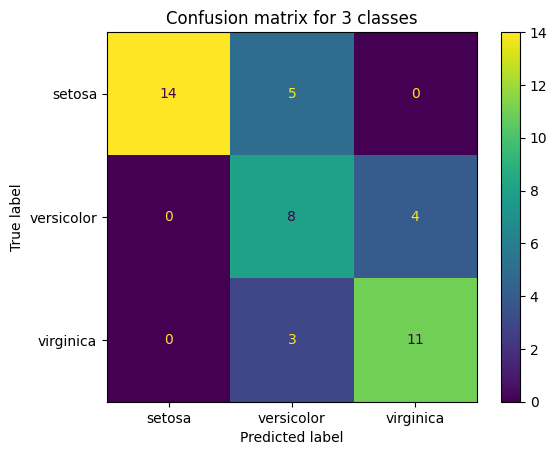

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix is great tool for observing the predicted results of model 
cm = confusion_matrix(y_test, y_pred)
types = ['setosa', 'versicolor', 'virginica']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=types)

disp.plot()
plt.title('Confusion matrix for 3 classes')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#metrics
def metrics( cm, y_pred, y_test ):
    # Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. 
    accuracy = accuracy_score( y_test, y_pred )

    # Precision is a measure of how accurate a model’s positive predictions are
    precision = precision_score( y_test, y_pred, average='weighted' )

    # Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset
    recall = recall_score( y_test, y_pred, average='weighted' )

    # F1-score is used to evaluate the overall performance of a classification model
    f1_score = (2 * precision * recall) / (precision + recall)

    print( "Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1_Score = {:.2f}" \
          .format(accuracy, precision, recall, f1_score))

metrics (cm, y_pred, y_test)
print( "score_accuracy = {}".format(model.score( X_test, y_test)))

Accuracy = 0.73, Precision = 0.78, Recall = 0.73, F1_Score = 0.76
score_accuracy = 0.7333333333333333


Now I will use all of the features for creating Logistic regression, we need to remember normalize our data for more accurate results and use regularizers in order optimize our model:

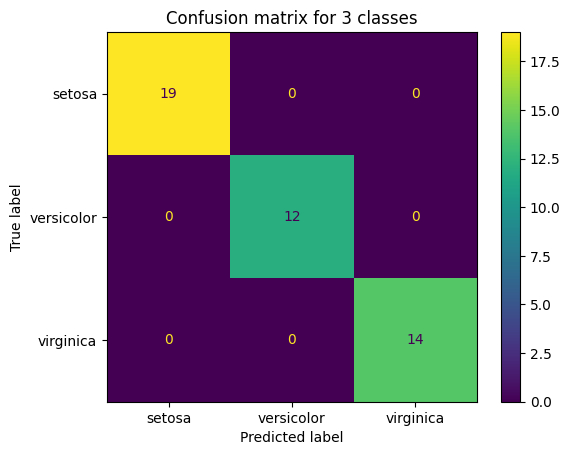

In [38]:
# Splitting data
X_train_all, X_test_all, y_train, y_test = train_test_split( features, target.to_numpy().ravel(), train_size=0.7, random_state= 120 )

# Creating model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_all, y_train)

# predicting actual class
y_pred = model.predict( X_test_all )

# Confusion matrix is great tool for observing the predicted results of model 
cm = confusion_matrix(y_test, y_pred)
types = ['setosa', 'versicolor', 'virginica']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=types)

disp.plot()
plt.title('Confusion matrix for 3 classes')
plt.show()
None

In [39]:
#metrics
metrics (cm, y_pred, y_test)
print( "score_accuracy = {}".format(model.score( X_test_all, y_test)))

Accuracy = 1.00, Precision = 1.00, Recall = 1.00, F1_Score = 1.00
score_accuracy = 1.0


We can see ideal results, I guess there is strong visible linear dependence, let`s check it:

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

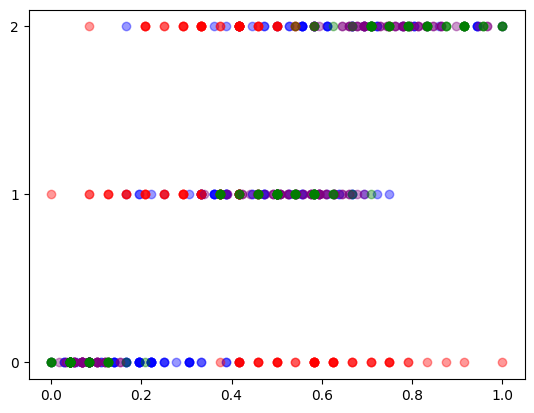

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

plt.scatter( scaled_features[:, 0], target, c = 'b', alpha=0.4  )
plt.scatter( scaled_features[:, 1], target, c = 'r', alpha=0.4)
plt.scatter( scaled_features[:, 2], target, c = 'purple', alpha=0.4)
plt.scatter( scaled_features[:, 3], target, c = 'g', alpha=0.4)
plt.yticks([0, 1, 2])

print( scaled_features )